In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
covid_df = pd.read_csv("data/owid-covid-data.csv", parse_dates=['date'])
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205916,ZWE,Africa,Zimbabwe,2022-07-29,256376.0,40.0,22.714,5577.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205917,ZWE,Africa,Zimbabwe,2022-07-30,256376.0,0.0,18.571,5577.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205918,ZWE,Africa,Zimbabwe,2022-07-31,256378.0,2.0,17.714,5577.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205919,ZWE,Africa,Zimbabwe,2022-08-01,256382.0,4.0,16.000,5577.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205921 entries, 0 to 205920
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    205921 non-null  object        
 1   continent                                   194015 non-null  object        
 2   location                                    205921 non-null  object        
 3   date                                        205921 non-null  datetime64[ns]
 4   total_cases                                 197555 non-null  float64       
 5   new_cases                                   197305 non-null  float64       
 6   new_cases_smoothed                          196128 non-null  float64       
 7   total_deaths                                178797 non-null  float64       
 8   new_deaths                                  178772 non-null  float64      

In [4]:
covid_df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [5]:
covid_df.location.nunique()

244

### Selecting the 'World' data

In [6]:
covid_world_df = covid_df[covid_df.location == "World"].reset_index()
covid_world_df

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,202418,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
1,202419,OWID_WRL,NaN,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2,202420,OWID_WRL,NaN,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
3,202421,OWID_WRL,NaN,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
4,202422,OWID_WRL,NaN,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,203337,OWID_WRL,NaN,World,2022-07-29,576257528.0,1401026.0,1033256.000,6398523.0,2956.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
920,203338,OWID_WRL,NaN,World,2022-07-30,576829405.0,571877.0,1024270.714,6399511.0,988.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
921,203339,OWID_WRL,NaN,World,2022-07-31,577370812.0,541407.0,1024720.857,6400325.0,814.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
922,203340,OWID_WRL,NaN,World,2022-08-01,578250895.0,880083.0,1003905.429,6402707.0,2382.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


### Finding the date of the maximum number of deaths all over the world

In [7]:
covid_world_df.iloc[covid_world_df.new_deaths.idxmax(),4]

Timestamp('2021-01-20 00:00:00')

### Creating a summary table for the most recent date all over the world

In [8]:
covid_world_df[covid_world_df['date'] == covid_world_df['date'].max()][['new_cases','total_cases']]

,new_cases,total_cases
923,1200804.0,579451699.0


### Find the last 28 day data

In [9]:
bf_28_fromnow_date = covid_world_df.date.max() - pd.Timedelta(28,'d')
covid_world_df_last_28_day = covid_world_df[covid_world_df.date > bf_28_fromnow_date]
covid_world_df_last_28_day

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
896,203314,OWID_WRL,NaN,World,2022-07-06,552773738.0,1230193.0,861457.000,6348402.0,2525.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
897,203315,OWID_WRL,NaN,World,2022-07-07,553812315.0,1038577.0,858694.000,6351043.0,2641.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
898,203316,OWID_WRL,NaN,World,2022-07-08,554797421.0,985106.0,865599.143,6353252.0,2209.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
899,203317,OWID_WRL,NaN,World,2022-07-09,555299041.0,501620.0,886220.714,6354132.0,880.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
900,203318,OWID_WRL,NaN,World,2022-07-10,555723967.0,424926.0,895645.714,6354860.0,728.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
901,203319,OWID_WRL,NaN,World,2022-07-11,556835308.0,1111341.0,925487.857,6356570.0,1711.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
902,203320,OWID_WRL,NaN,World,2022-07-12,558030702.0,1195394.0,926736.714,6358811.0,2241.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
903,203321,OWID_WRL,NaN,World,2022-07-13,559481924.0,1451222.0,958312.286,6362210.0,3399.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
904,203322,OWID_WRL,NaN,World,2022-07-14,560441227.0,959303.0,946987.429,6364105.0,1895.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
905,203323,OWID_WRL,NaN,World,2022-07-15,561454486.0,1013259.0,951009.286,6366324.0,2219.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


### Calculating the percentage of confirmed cases regarding the world population

In [10]:
(covid_world_df.total_cases.max() / covid_world_df.population.max()) * 100

7.326211601212982

### discover the diff between world data and get sum of all countries

In [11]:
covid_world_df[['total_cases','new_cases','total_deaths','new_deaths']]

,total_cases,new_cases,total_deaths,new_deaths
0,557.0,0.0,17.0,0.0
1,657.0,100.0,18.0,1.0
2,944.0,287.0,26.0,8.0
3,1437.0,493.0,42.0,16.0
4,2120.0,683.0,56.0,14.0
...,...,...,...,...
919,576257528.0,1401026.0,6398523.0,2956.0
920,576829405.0,571877.0,6399511.0,988.0
921,577370812.0,541407.0,6400325.0,814.0
922,578250895.0,880083.0,6402707.0,2382.0


In [12]:
covid_world_df.groupby('date')[['total_cases','new_cases','total_deaths','new_deaths']].sum()

,total_cases,new_cases,total_deaths,new_deaths
date,,,,
2020-01-22,557.0,0.0,17.0,0.0
2020-01-23,657.0,100.0,18.0,1.0
2020-01-24,944.0,287.0,26.0,8.0
2020-01-25,1437.0,493.0,42.0,16.0
2020-01-26,2120.0,683.0,56.0,14.0
...,...,...,...,...
2022-07-29,576257528.0,1401026.0,6398523.0,2956.0
2022-07-30,576829405.0,571877.0,6399511.0,988.0
2022-07-31,577370812.0,541407.0,6400325.0,814.0


In [13]:
covid_df.groupby('date')[['total_cases','new_cases','total_deaths','new_deaths']].sum() 
#The values present in each day must be equal to the world table, but different because it collects repetitive data such as the European Union or the continents and so on

,total_cases,new_cases,total_deaths,new_deaths
date,,,,
2020-01-01,0.000000e+00,0.0,0.0,0.0
2020-01-02,0.000000e+00,0.0,0.0,0.0
2020-01-03,0.000000e+00,0.0,0.0,0.0
2020-01-04,0.000000e+00,0.0,0.0,0.0
2020-01-05,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...
2022-07-29,2.464389e+09,5839093.0,26713082.0,12709.0
2022-07-30,2.466748e+09,2359406.0,26717234.0,4152.0
2022-07-31,2.468959e+09,2211089.0,26720626.0,3392.0


Text(0, 0.5, 'N Of Cases')

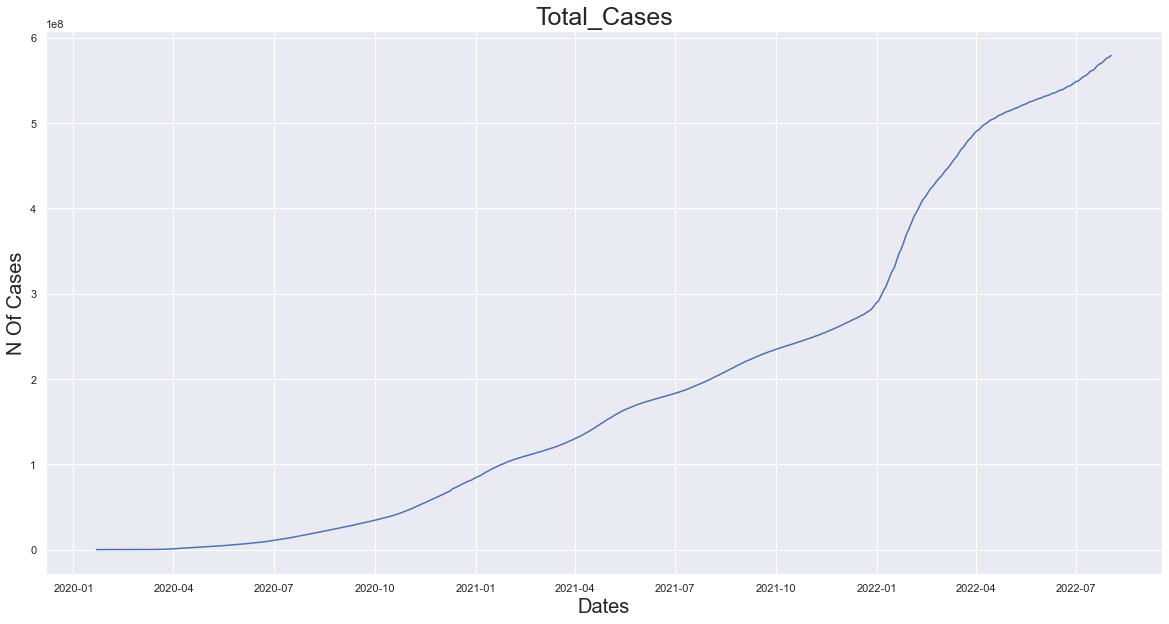

In [14]:
plt.figure(figsize=(20,10))
plt.plot(covid_world_df.date , covid_world_df.total_cases)
plt.title('Total_Cases',fontsize=25)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('N Of Cases',fontsize=20)

Text(0, 0.5, 'N Of New_Cases')

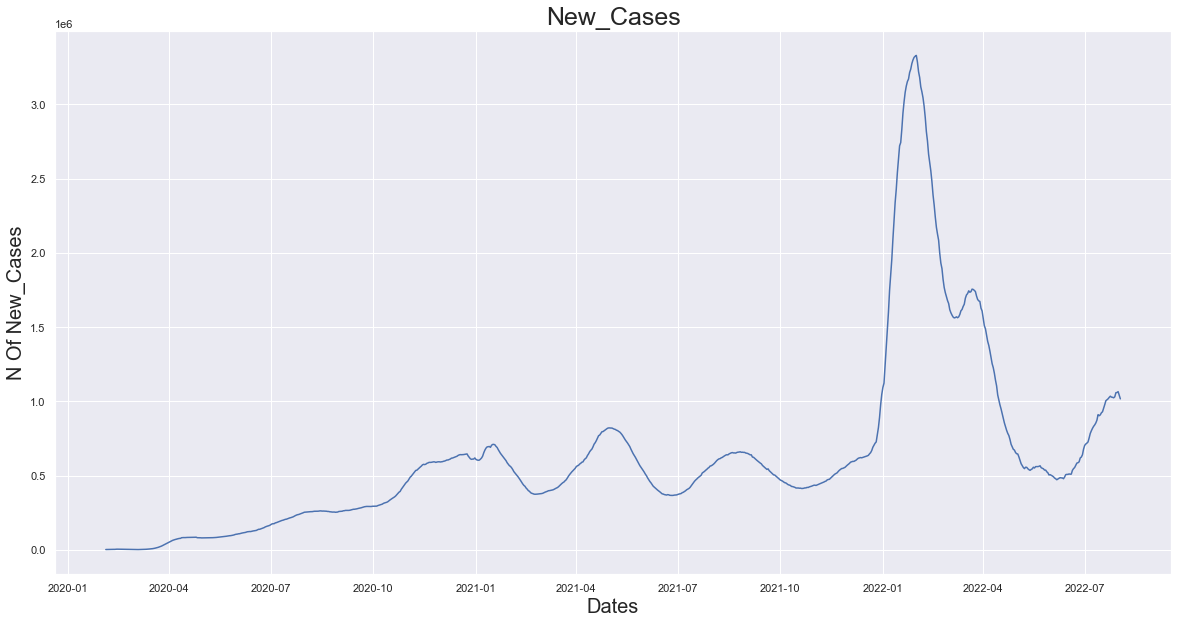

In [15]:
plt.figure(figsize=(20,10))
plt.plot(covid_world_df.date , covid_world_df.new_cases.rolling(14).mean())
plt.title('New_Cases',fontsize=25)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('N Of New_Cases',fontsize=20)

Text(0, 0.5, 'N Of Total_Deaths')

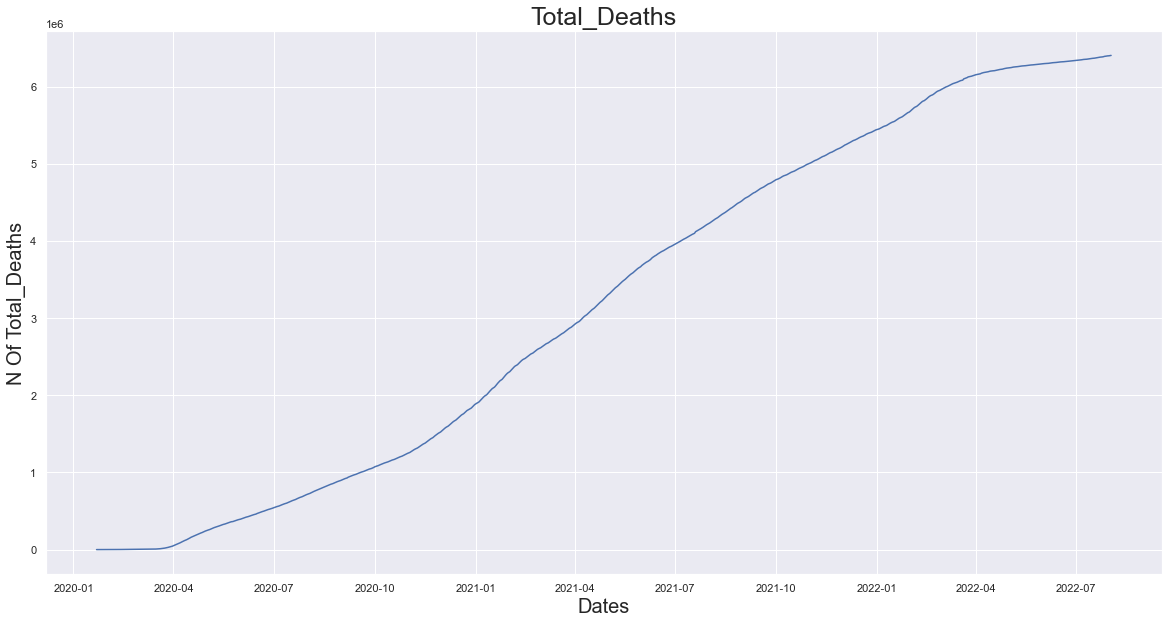

In [16]:
plt.figure(figsize=(20,10))
plt.plot(covid_world_df.date , covid_world_df.total_deaths)
plt.title('Total_Deaths',fontsize=25)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('N Of Total_Deaths',fontsize=20)

Text(0, 0.5, 'N Of New_Deaths')

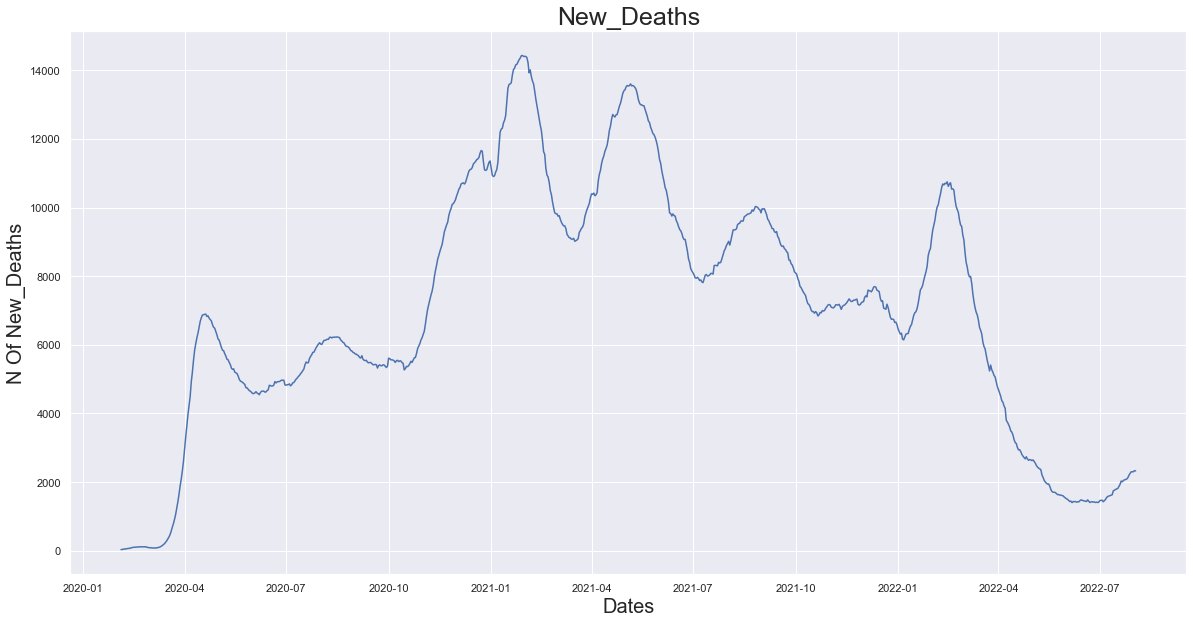

In [17]:
plt.figure(figsize=(20,10))
plt.plot(covid_world_df.date , covid_world_df.new_deaths.rolling(14).mean())
plt.title('New_Deaths',fontsize=25)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('N Of New_Deaths',fontsize=20)

## EXPLORING EGYPT DATA

### Let's first get 'Egypt' data

In [18]:
covid_egypt_df = covid_df[covid_df.location == 'Egypt'].reset_index(drop=True)
covid_egypt_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,EGY,Africa,Egypt,2020-02-14,1.0,1.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
1,EGY,Africa,Egypt,2020-02-15,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
2,EGY,Africa,Egypt,2020-02-16,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
3,EGY,Africa,Egypt,2020-02-17,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
4,EGY,Africa,Egypt,2020-02-18,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,EGY,Africa,Egypt,2022-07-29,515645.0,0.0,0.0,24765.0,0.0,2.143,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
897,EGY,Africa,Egypt,2022-07-30,515645.0,0.0,0.0,24765.0,0.0,2.143,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
898,EGY,Africa,Egypt,2022-07-31,515645.0,0.0,0.0,24765.0,0.0,2.143,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
899,EGY,Africa,Egypt,2022-08-01,515645.0,0.0,0.0,24765.0,0.0,0.000,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN


### Creating a summary table for the most recent 'Egypt' data


In [19]:
covid_egypt_last_record_df = covid_egypt_df.tail(1)
covid_egypt_last_record_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
900,EGY,Africa,Egypt,2022-08-02,515645.0,0.0,0.0,24775.0,10.0,1.429,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN


In [20]:
covid_egypt_last_record_df[['date','total_cases', 'new_cases', 'total_deaths', 'new_deaths' ]]

,date,total_cases,new_cases,total_deaths,new_deaths
900,2022-08-02,515645.0,0.0,24775.0,10.0


### Calculating the maximum values of 'Egypt' data

In [30]:
covid_egypt_df[['date','total_cases', 'new_cases', 'total_deaths', 'new_deaths' ]].max()

date            2022-08-02 00:00:00
total_cases                515645.0
new_cases                    5516.0
total_deaths                24775.0
new_deaths                    132.0
dtype: object

### The highest date recorded for death in Egypt


In [31]:
covid_egypt_df[covid_egypt_df.new_deaths == covid_egypt_df.new_deaths.max()]['date']

640   2021-11-15
Name: date, dtype: datetime64[ns]

### The average value(s) of daily-recorded data in Egypt

In [33]:
covid_egypt_df.new_cases.mean()

572.3029966703663

### New cases of January 2021 in Egypt

In [36]:
covid_egypt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    901 non-null    object        
 1   continent                                   901 non-null    object        
 2   location                                    901 non-null    object        
 3   date                                        901 non-null    datetime64[ns]
 4   total_cases                                 901 non-null    float64       
 5   new_cases                                   901 non-null    float64       
 6   new_cases_smoothed                          896 non-null    float64       
 7   total_deaths                                878 non-null    float64       
 8   new_deaths                                  878 non-null    float64       
 9   new_deaths

In [35]:
covid_egypt_df[(covid_egypt_df.date >= '2021-1-1') & (covid_egypt_df.date < '2021-2-1')][['date','new_cases']]

,date,new_cases
322,2021-01-01,1409.0
323,2021-01-02,1407.0
324,2021-01-03,1309.0
325,2021-01-04,1277.0
326,2021-01-05,1119.0
327,2021-01-06,1007.0
328,2021-01-07,1219.0
329,2021-01-08,1001.0
330,2021-01-09,989.0
331,2021-01-10,993.0


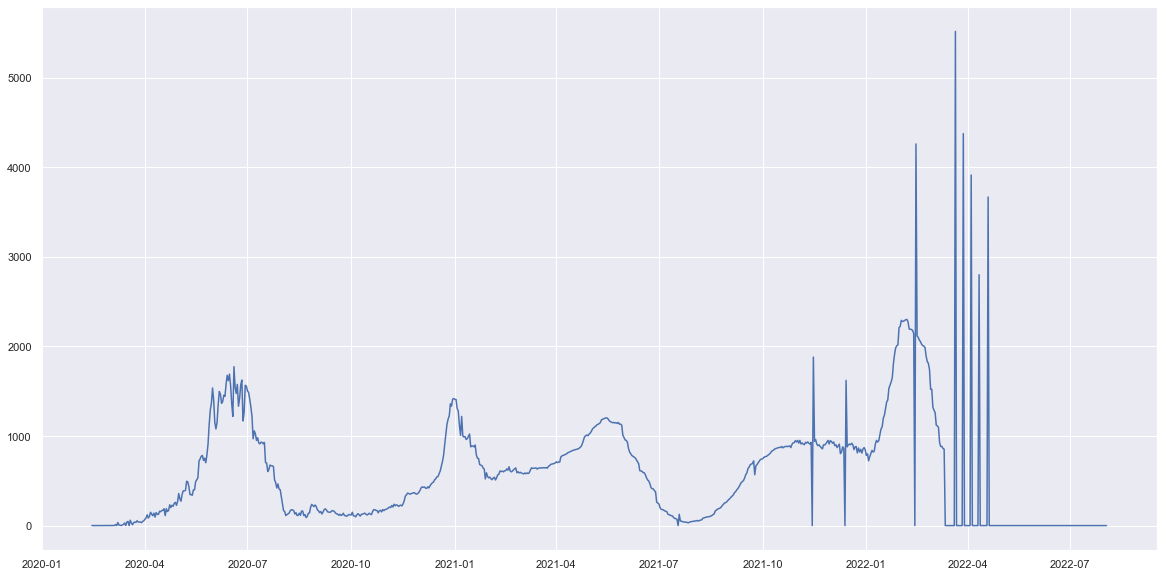

In [42]:
plt.figure(figsize=(20,10))
plt.plot(covid_egypt_df.date , covid_egypt_df.new_cases)

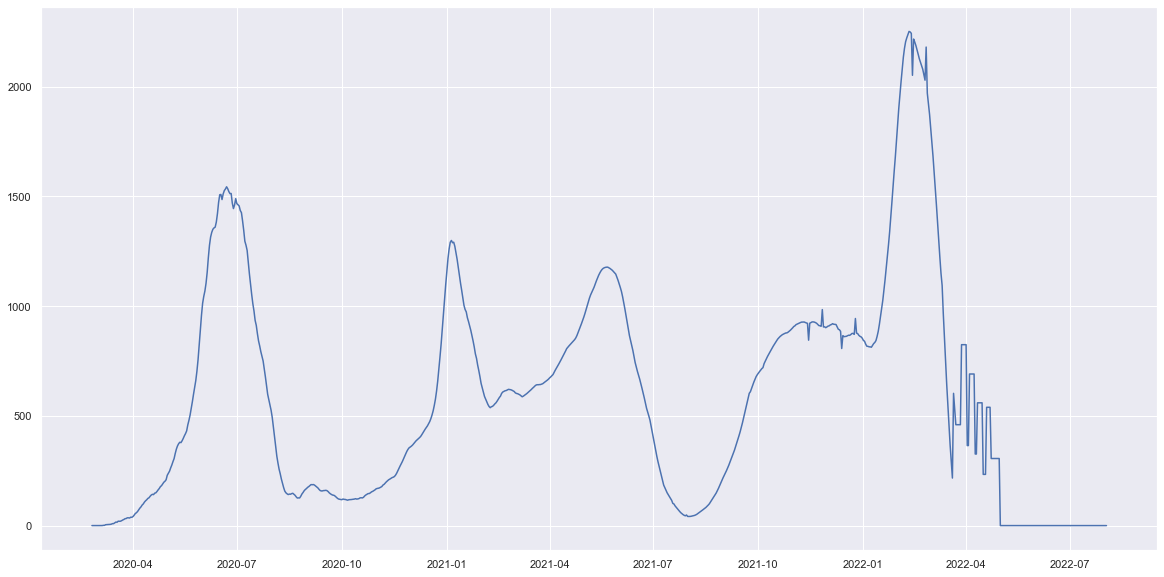

In [41]:
plt.figure(figsize=(20,10))
plt.plot(covid_egypt_df.date , covid_egypt_df.new_cases.rolling(12).mean())